In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 12, 8)
df = web.DataReader("AAPL", 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860230
...,...,...,...,...,...,...
2021-12-02,164.199997,157.800003,158.740005,163.759995,136739200.0,163.085144
2021-12-03,164.960007,159.720001,164.020004,161.839996,118023100.0,161.173050
2021-12-06,167.880005,164.279999,164.289993,165.320007,107497000.0,164.638718


In [3]:
print(df.head())
print(df.shape)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.540046
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.607436
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.747405
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.880664
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.860230
(2501, 6)


In [4]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

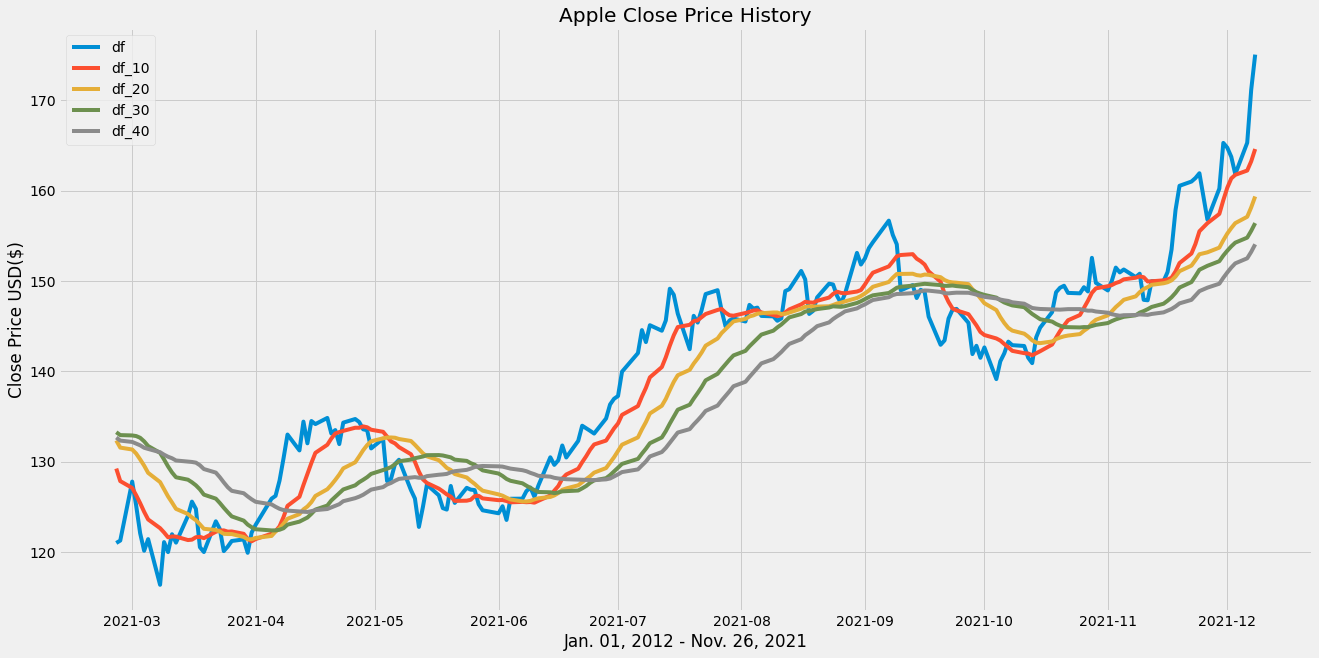

In [5]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Nov. 26, 2021')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [6]:
# Creating a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [7]:
dataset = data.values # to numpy array

In [8]:
#no. of rows
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2001

In [9]:
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.00458806],
        [0.00507789],
        [0.00609525],
        ...,
        [0.93942877],
        [0.97579626],
        [1.        ]]),
 (2501, 1))

In [10]:
# Creating the training data set
train_data = scaled_data[0:training_data_len,:]
## Spliting the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00458806, 0.00507789, 0.00609525, 0.00706384, 0.00691534,
       0.00725002, 0.00709708, 0.00683998, 0.00648977, 0.00757362,
       0.00855108, 0.00824964, 0.00659838, 0.00817428, 0.00662276,
       0.01244096, 0.01199102, 0.01257838, 0.01384841, 0.01461751,
       0.01455324, 0.01431608, 0.01532678, 0.01627764, 0.01735484,
       0.01909476, 0.02274969, 0.0228051 , 0.02483981, 0.02636029,
       0.0237471 , 0.02475336, 0.02473342, 0.02755497, 0.02715378,
       0.02789629, 0.0292306 , 0.02997312, 0.03211199, 0.03367015,
       0.03412009, 0.03427747, 0.03161329, 0.03097051, 0.03106583,
       0.03357042, 0.03427526, 0.0357891 , 0.03935758, 0.04411853,
       0.04322751, 0.04322972, 0.04667188, 0.04774909, 0.04698218,
       0.04628179, 0.04555257, 0.04797515, 0.0496375 , 0.05033347])]
[0.048613493418553824]

[array([0.00458806, 0.00507789, 0.00609525, 0.00706384, 0.00691534,
       0.00725002, 0.00709708, 0.00683998, 0.00648977, 0.00757362,
       0.00855108, 0.00824964, 0.0

In [11]:
#Converting the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1941, 60, 1)

In [13]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1941/1941 [==============================] - 51s 25ms/step - loss: 2.0406e-04 0s - loss: 
Epoch 2/5
1941/1941 [==============================] - 45s 23ms/step - loss: 1.2311e-04 37s - loss: 7.6476e- - ETA: 37s - lo - ETA - ETA: 36s - loss: 7.5879 - ETA: 35s - loss: 7. - ETA: 35s - loss: 7.4171 - ETA: 35s  - ETA:  - ETA:  - ETA: 19s - loss: 1.4918e- - ETA: 19s - loss: 1. - ETA: 19 - ETA: 18s  - ETA: 16s -  - ETA: 12s  - ETA: 12s  - ETA:  - ETA: 10s - loss: 1.4272e- - ETA: 10s -  - ETA: 10s - l - E - ETA: 6s - loss: 1. - ETA: 5s - loss: 1.3353e-0 - ETA: 5s  - ETA: 4s - loss: 1.3144e-0 - ETA: 4s - loss: 1.3125e - ETA: 4 - ETA: 2s - loss - ETA: 1s - loss: 1.2662e - ETA: 1s - loss: 1.2611e- - ETA: 1s - loss: 1.2587e - ETA: 1s - l - ETA: 0s - loss: 1.
Epoch 3/5
1941/1941 [==============================] - 47s 24ms/step - loss: 6.4933e-05 8s - loss: 5. - ETA:  - ETA: 6s - loss: 5.8 - ETA: 5s - loss:  -  - ETA: 1 - ETA: 0s - loss: 6.2642e- - ETA: 0s - loss: 6.3088 - ETA: 0s - loss: 6

In [16]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [17]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
# predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
print(predictions[0:5], y_test[0:5])

[[68.96107]
 [70.03015]
 [70.45089]
 [70.41403]
 [70.41297]] [[69.96499634]
 [70.10250092]
 [69.93499756]
 [70.00499725]
 [69.86000061]]


In [21]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.3106786274530748, 0.5573855285644531)

<ipython-input-22-549ceefe4e21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


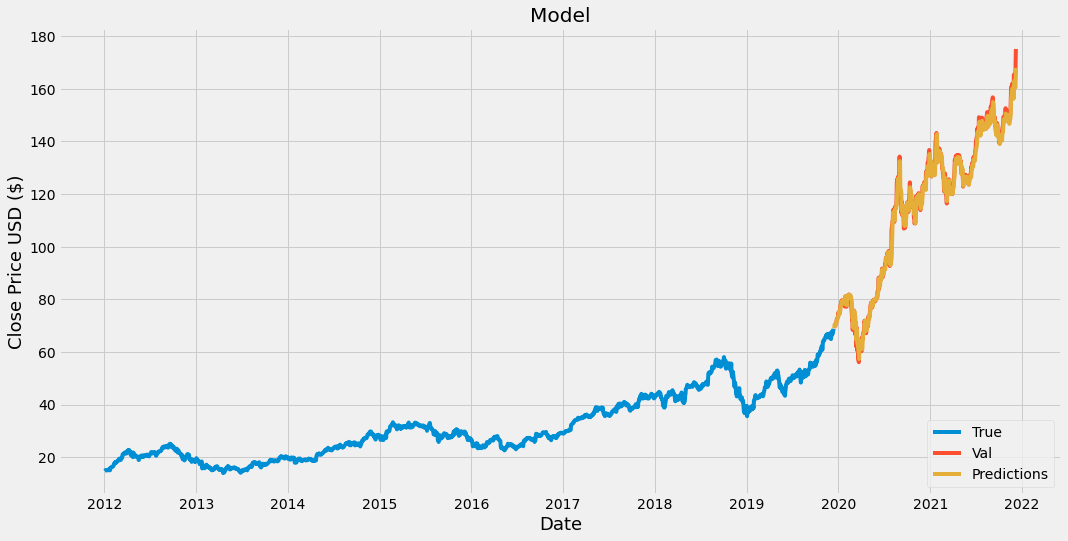

In [22]:
# Plot 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [23]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-08')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print( "Predicted Price",pred_price)

Predicted Price [[172.20424]]


In [24]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-12-08', end='2021-12-08')
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-07,171.580002,168.339996,169.080002,171.179993,120405400,170.474548
2021-12-08,175.960007,170.699997,172.130005,175.080002,116998900,174.358505


In [25]:
y_pred = pred_price[0][0]
y_test = apple_quote2.iat[0,5]
print('Accuracy ',100 - (((y_test - y_pred)/y_test)*100))

Accuracy  101.01463272295032
